
assisted_df:
count     33.000000
mean     120.575758
std       68.614881
min       11.000000
25%       74.000000
50%      114.000000
75%      167.000000
max      328.000000
Name: human_words, dtype: float64
assisted: len(success_df)=23

unassisted_df:
count      9.000000
mean      59.444444
std       40.059678
min       29.000000
25%       39.000000
50%       51.000000
75%       54.000000
max      160.000000
Name: human_words, dtype: float64
unassisted: len(success_df)=1
wrote pilot_study/word_counts.pdf


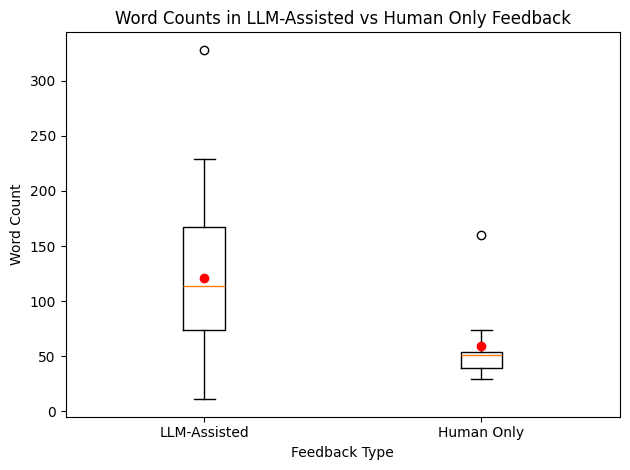

In [81]:
import os
import importlib
import config
import matplotlib.pyplot as plt
import pandas as pd
importlib.reload(config)

# fname = "pilot_orig9.xlsx"
fname = "pilot_final.xlsx"
p1 = config.safe_read_sheet(os.path.join(config.ROOT_DIR, "backend", fname), "P1")
s1 = config.safe_read_sheet(os.path.join(config.ROOT_DIR, "backend", fname), "S1")


p1['human_words'] = p1['human_feedback'].str.split().apply(len)
s1['human_words'] = s1['human_feedback'].str.split().apply(len)

all_df = pd.concat([p1, s1], ignore_index=True)

assisted_df = all_df.dropna(subset=["ai_feedback"])

# filter from all_df where ai_feedback is undefined
unassisted_df = all_df[all_df["ai_feedback"].isna()]

print("\nassisted_df:")
print(assisted_df["human_words"].describe())
# filter by ["human_words"] which contain the word "succes" (case insensitive)
success_df = assisted_df[assisted_df["human_feedback"].str.contains("succes", case=False)]
print(f"assisted: {len(success_df)=}")

# print text around the word "succes" in each feedback (with a for loop):
# for i, row in success_df.iterrows():
#     loc = row["human_feedback"].lower().find("succes")
#     context = row["human_feedback"][max(0, loc-20):min(loc+20, len(row["human_feedback"]))]
#     print(f"\n\n## {i}: {context}")

print("\nunassisted_df:")
print(unassisted_df["human_words"].describe())
success_df = unassisted_df[unassisted_df["human_feedback"].str.contains("succes", case=False)]
print(f"unassisted: {len(success_df)=}")




MEANPROPS = dict(
    marker="o",
    markerfacecolor="red",
    markeredgecolor="red",
    linestyle="--",
    color="red",
    linewidth=2,
)
plt.title("Word Counts in LLM-Assisted vs Human Only Feedback")
plt.boxplot([assisted_df["human_words"], unassisted_df["human_words"]], showmeans=True, meanprops=MEANPROPS)
plt.ylabel("Word Count")
plt.xlabel("Feedback Type")
plt.xticks(range(1, 3), ["LLM-Assisted", "Human Only"])
plt.tight_layout()
fname = "pilot_study/word_counts.pdf"
plt.savefig(fname)
print(f"wrote {fname}")

In [ ]:
# reorder rows of p1 and s1 based on the order of 'attempt_id' in orig_p1 and orig_s1 (with new rows at the bottom)

orig_p1 = config.safe_read_sheet(os.path.join(config.ROOT_DIR, "backend", "pilot_orig9.xlsx"), "P1")
orig_s1 = config.safe_read_sheet(os.path.join(config.ROOT_DIR, "backend", "pilot_orig9.xlsx"), "S1")

print(p1.columns)
print("before:")
print(p1.head()["attempt_id"])
print(p1.tail()["attempt_id"])

# reorder p1 based on index of 'attempt_id' in orig_p1 (with IDs not present in orig_p1 at the end)
# add column with index of 'attempt_id' in orig_p1 (or 1000000 if not present)
p1["orig_index"] = p1["attempt_id"].apply(lambda x: orig_p1[orig_p1["attempt_id"] == x].index[0] if x in orig_p1["attempt_id"].values else 1000000)
p1 = p1.sort_values("orig_index")
p1 = p1.drop(columns=["orig_index"])
s1["orig_index"] = s1["attempt_id"].apply(lambda x: orig_s1[orig_s1["attempt_id"] == x].index[0] if x in orig_s1["attempt_id"].values else 1000000)
s1 = s1.sort_values("orig_index")
s1 = s1.drop(columns=["orig_index"])

print("after:")
print(p1.head()["attempt_id"])
print(p1.tail()["attempt_id"])
config.safe_append_sheet(p1, "filtered_P1", os.path.join(config.ROOT_DIR, "backend", fname))
config.safe_append_sheet(s1, "filtered_S1", os.path.join(config.ROOT_DIR, "backend", fname))
